# College Admissions Analysis

## by Damien Ha

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_excel("Top100_US_colleges.xlsx")
df.head()

,Rank,College Name,State,Undergraduate Tuition & Fees,SAT Score,Acceptance Rate,Population,Graduation Rate,Student to Faculty Ratio
0,1,Stanford University,CA,"$56,169",1505,0.04,17381,0.94,5 to 1
1,2,Harvard University,MA,"$54,002",1515,0.05,31566,0.97,7 to 1
2,3,Princeton University,NJ,"$48,502",1515,0.06,8374,0.98,5 to 1
3,4,Massachusetts Institute of Technology,MA,"$53,450",1540,0.07,11574,0.95,3 to 1
4,5,Columbia University in the City of New York,NY,"$61,671",1505,0.05,31077,0.95,6 to 1


In [3]:
print(df.shape)

(100, 9)


In [4]:
df.isna().sum()

Rank                            0
College Name                    0
State                           0
Undergraduate Tuition & Fees    0
SAT Score                       0
Acceptance Rate                 0
Population                      0
Graduation Rate                 0
Student to Faculty Ratio        0
dtype: int64

In [5]:
df.dtypes

Rank                              int64
College Name                     object
State                            object
Undergraduate Tuition & Fees     object
SAT Score                        object
Acceptance Rate                 float64
Population                        int64
Graduation Rate                 float64
Student to Faculty Ratio         object
dtype: object

In [6]:
df.loc[df['SAT Score'] == '-']

,Rank,College Name,State,Undergraduate Tuition & Fees,SAT Score,Acceptance Rate,Population,Graduation Rate,Student to Faculty Ratio
79,80,Wake Forest University,NC,"$57,760",-,0.3,8401,0.88,10 to 1


In [7]:
df['SAT Score'].replace({'-': np.nan}, inplace=True)

In [8]:
# Print some average statistics
print("The average SAT score of the top 100 colleges in the US is " + str(round(df['SAT Score'].mean(), 0)))
print("The average acceptance rate of the top 100 colleges in the US is " + str(df['Acceptance Rate'].mean()*100) + "%")
print("The average graduation rate of the top 100 colleges in the US is " + str(round(df['Graduation Rate'].mean()*100, 2)) + "%")

The average SAT score of the top 100 colleges in the US is 1368.0
The average acceptance rate of the top 100 colleges in the US is 36.68000000000001%
The average graduation rate of the top 100 colleges in the US is 84.67%


In [9]:
df.describe()

,Rank,SAT Score,Acceptance Rate,Population,Graduation Rate
count,100.000000,99.000000,100.00000,100.000000,100.000000
mean,50.500000,1367.525253,0.36680,24880.730000,0.846700
std,29.011492,108.457115,0.21841,16724.784256,0.092791
min,1.000000,915.000000,0.04000,1557.000000,0.510000
25%,25.750000,1290.000000,0.16000,11002.000000,0.810000
50%,50.500000,1365.000000,0.36000,19452.000000,0.860000
75%,75.250000,1442.500000,0.54250,36495.750000,0.922500
max,100.000000,1545.000000,0.86000,68679.000000,0.980000


In [10]:
print(df[df['SAT Score'] == 915])

    Rank          College Name State Undergraduate Tuition & Fees  SAT Score   
73    74  Gallaudet University    DC                      $17,038      915.0  \

    Acceptance Rate  Population  Graduation Rate Student to Faculty Ratio  
73             0.61        1557             0.51                   6 to 1  


In [11]:
print((915-1368)/108)

-4.194444444444445


This value is an outlier. This makes sense, Gaullaudet is a deaf school, and a great deal of mainstreamed deaf students likely have not had the proper educational resources for most of their academic careers.

In [12]:
# Change tuition to integer, remove dollar sign
df['Undergraduate Tuition & Fees'] = df['Undergraduate Tuition & Fees'].replace("[$,]", "", regex=True).astype(int)

In [13]:
df.dtypes

Rank                              int64
College Name                     object
State                            object
Undergraduate Tuition & Fees      int64
SAT Score                       float64
Acceptance Rate                 float64
Population                        int64
Graduation Rate                 float64
Student to Faculty Ratio         object
dtype: object

In [14]:
df['Student to Faculty Ratio'] = df['Student to Faculty Ratio'].str.extract('(\d+)').astype(int)
df.head()

,Rank,College Name,State,Undergraduate Tuition & Fees,SAT Score,Acceptance Rate,Population,Graduation Rate,Student to Faculty Ratio
0,1,Stanford University,CA,56169,1505.0,0.04,17381,0.94,5
1,2,Harvard University,MA,54002,1515.0,0.05,31566,0.97,7
2,3,Princeton University,NJ,48502,1515.0,0.06,8374,0.98,5
3,4,Massachusetts Institute of Technology,MA,53450,1540.0,0.07,11574,0.95,3
4,5,Columbia University in the City of New York,NY,61671,1505.0,0.05,31077,0.95,6


In [15]:
df.dtypes

Rank                              int64
College Name                     object
State                            object
Undergraduate Tuition & Fees      int64
SAT Score                       float64
Acceptance Rate                 float64
Population                        int64
Graduation Rate                 float64
Student to Faculty Ratio          int64
dtype: object

In [16]:
df = df.drop(columns = ['College Name', 'Rank'])
le = LabelEncoder()
df['target'] = le.fit_transform(df['State'])
df = df.drop(columns = ['State'])
df.head()

,Undergraduate Tuition & Fees,SAT Score,Acceptance Rate,Population,Graduation Rate,Student to Faculty Ratio,target
0,56169,1505.0,0.04,17381,0.94,5,2
1,54002,1515.0,0.05,31566,0.97,7,13
2,48502,1515.0,0.06,8374,0.98,5,20
3,53450,1540.0,0.07,11574,0.95,3,13
4,61671,1505.0,0.05,31077,0.95,6,21


In [17]:
df.isna().sum()

Undergraduate Tuition & Fees    0
SAT Score                       1
Acceptance Rate                 0
Population                      0
Graduation Rate                 0
Student to Faculty Ratio        0
target                          0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
print(le.classes_)

[' AR' ' AZ' ' CA' ' CO' ' CT' ' DC' ' DE' ' FL' ' GA' ' HI' ' IL' ' IN'
 ' LA' ' MA' ' MD' ' MI' ' MN' ' MO' ' NC' ' NH' ' NJ' ' NY' ' OH' ' OK'
 ' PA' ' RI' ' TN' ' TX' ' UT' ' VA' ' WA' ' WI']


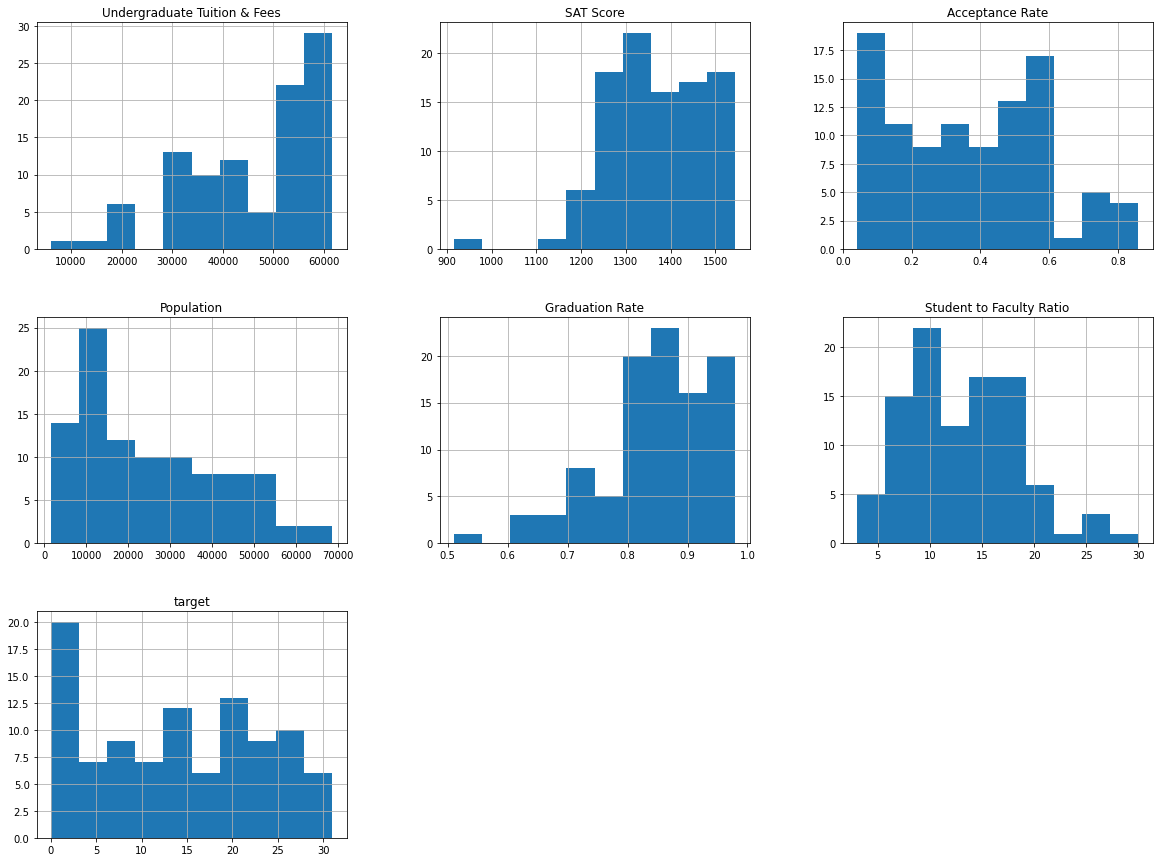

In [20]:
df.hist(figsize = (20,15))
plt.show()

In [21]:
def heatmap(data, row_labels, col_labels, figsize = (20,12), cmap = "YlGn",
            cbar_kw={}, cbarlabel="", valfmt="{x:.2f}",
            textcolors=("black", "white"), threshold=None):
    """
    Create a heatmap from a numpy array and two lists of labels. 
    
    Taken from matplotlib example.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cmap
        A string that specifies the colormap to use. Look at matplotlib docs for information.
        Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
    """

    plt.figure(figsize = figsize)
    ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data,cmap=cmap)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    
    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

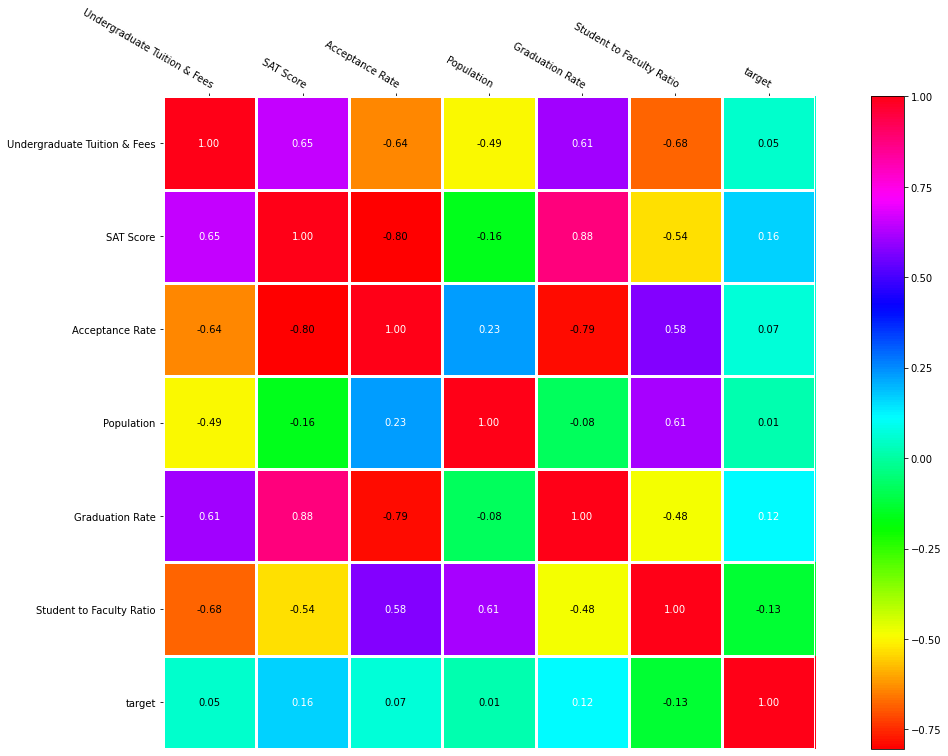

In [22]:
correlations = df.corr()
columns = list(df)
#Creates the heatmap
heatmap(correlations.values,columns,columns,figsize = (20,12),cmap="hsv")

In [23]:
correlations["target"].sort_values(ascending=False)

target                          1.000000
SAT Score                       0.161781
Graduation Rate                 0.117896
Acceptance Rate                 0.067889
Undergraduate Tuition & Fees    0.054531
Population                      0.014164
Student to Faculty Ratio       -0.131328
Name: target, dtype: float64

In [24]:
y = df["target"]
x = df.drop(["target"],axis = 1)

In [25]:
# Identify classes with less than two instances
unique_classes, class_counts = np.unique(y, return_counts=True)
classes_with_one_instance = unique_classes[class_counts < 2]

# Filter the data to exclude classes with one instance
mask = np.isin(y, classes_with_one_instance, invert=True)
x_filtered = x[mask]
y_filtered = y[mask]

# Split the filtered data
train_raw, test_raw, target, target_test = train_test_split(x_filtered, y_filtered, test_size=0.3, stratify=y_filtered, random_state=0)

In [26]:
print("Training shape:", train_raw.shape)
print("Testing shape:", test_raw.shape)

Training shape: (60, 6)
Testing shape: (27, 6)


In [27]:
# k-Nearest Neighbors algorithm
knn = KNeighborsClassifier()
knn.fit(train_raw, target)
predicted = knn.predict(test_raw)
print("Accuracy: ", accuracy_score(target_test, predicted))

Accuracy:  0.14814814814814814


In [28]:
num = ['Undergraduate Tuition & Fees', 'SAT Score', 'Acceptance Rate', 'Population', 'Graduation Rate', 'Student to Faculty Ratio']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num)])

pipeline = Pipeline([('preprocessor', preprocessor), ('knn', KNeighborsClassifier(n_neighbors=3))])

In [29]:
train = pipeline['preprocessor'].fit_transform(train_raw)
test = pipeline['preprocessor'].transform(test_raw)

pipeline['knn'].fit(train, target)

predicted = pipeline['knn'].predict(test)

accuracy = accuracy_score(target_test, predicted)

print("Accuracy:", accuracy)

Accuracy: 0.14814814814814814


In [30]:
n_values = [1, 2, 3, 5, 7, 9, 10, 20, 50]
accuracies = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train, target)
    
    predicted = knn.predict(test)
    
    accuracy = accuracy_score(target_test, predicted)
    accuracies.append(accuracy)

for n, accuracy in zip(n_values, accuracies):
    print(f"n_neighbors = {n}: Accuracy = {accuracy}")

n_neighbors = 1: Accuracy = 0.18518518518518517
n_neighbors = 2: Accuracy = 0.14814814814814814
n_neighbors = 3: Accuracy = 0.14814814814814814
n_neighbors = 5: Accuracy = 0.18518518518518517
n_neighbors = 7: Accuracy = 0.14814814814814814
n_neighbors = 9: Accuracy = 0.14814814814814814
n_neighbors = 10: Accuracy = 0.1111111111111111
n_neighbors = 20: Accuracy = 0.14814814814814814
n_neighbors = 50: Accuracy = 0.18518518518518517


In [31]:
logreg = LogisticRegression()
logreg.fit(train, target)

predicted = logreg.predict(test)

accuracy = accuracy_score(target_test, predicted)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.2222222222222222


In [32]:
logreg = LogisticRegression(solver= 'liblinear', max_iter= 1000, penalty = 'l2', C=1)
logreg.fit(train, target)

predicted = logreg.predict(test)

accuracy = accuracy_score(target_test, predicted)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.2222222222222222


In [33]:
logreg = LogisticRegression(solver= 'liblinear', max_iter= 1000, penalty = 'l2', C=0.0001)
logreg.fit(train, target)

predicted = logreg.predict(test)

accuracy = accuracy_score(target_test, predicted)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.07407407407407407


In [34]:
logreg = LogisticRegression(solver= 'liblinear', max_iter= 1000, penalty = 'l1', C=0.0001)
logreg.fit(train, target)

predicted = logreg.predict(test)

accuracy = accuracy_score(target_test, predicted)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.18518518518518517


In [38]:
svm = SVC()
svm.fit(train, target)
predicted = svm.predict(test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))
print("Number of support vectors:", svm.n_support_)

Accuracy:    0.148148
Number of support vectors: [10  1  1  3  4  2  3  2  6  1  1  1  2  2  6  2  4  1  5  2]


In [37]:
svm = SVC(kernel = 'linear')
svm.fit(train, target)
predicted = svm.predict(test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))
print("Number of support vectors:", svm.n_support_)

Accuracy:    0.185185
Number of support vectors: [11  1  1  3  4  2  3  2  6  1  1  1  2  2  6  2  4  1  5  2]


In [39]:
clf = DecisionTreeClassifier(criterion="gini", random_state = 0)
clf.fit(train, target)
predicted = clf.predict(test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))

Accuracy:    0.185185


In [40]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=800, random_state=0)
mlp_classifier.fit(train, target)
y_train_pred = mlp_classifier.predict(test)
train_accuracy = accuracy_score(target_test, y_train_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.18518518518518517
